___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)  # to avoid scientific number display

In [2]:
import tensorflow as tf
# check if it's connected to GPU
tf.config.list_physical_devices("GPU") 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset") 

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [8]:
# Check the shape of one image
X_train[20].shape

# 28 x 28 images with one channel

(28, 28)

In [9]:
# check its pixels
X_train[20]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,  65,  99,   0,   0,
          0,   0,   0,   0,   0, 106,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  17, 190, 206, 202, 145, 148,
        146, 148, 166, 165, 189, 212, 210, 202,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160, 229, 193, 189, 197, 169,
        182, 109, 165, 156, 202, 198, 196, 233,  96,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2, 199, 198, 213, 193, 201, 207,
        196, 172, 211, 206, 207, 200, 202, 208, 217,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 139, 205, 200, 207, 190, 192, 210,
        210, 208, 212, 208, 197, 201, 210, 206, 205,  83,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2, 196, 220, 200, 200, 190, 193, 199,
        222, 222, 225, 199, 198, 210, 212, 218, 227, 189,   0,   0,   0,
          0,   0],
       [  

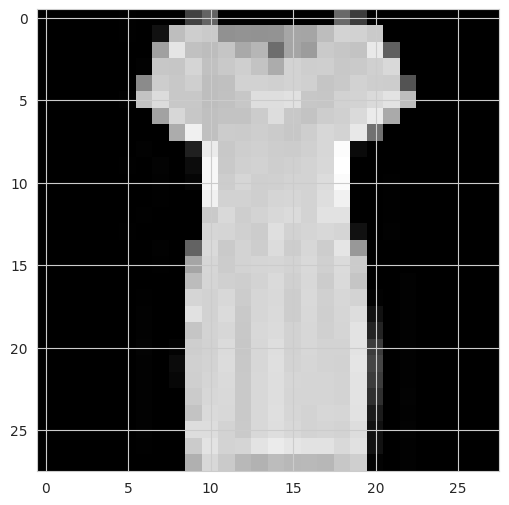

In [10]:
# display the image
plt.imshow(X_train[20],cmap='gray')

<Axes: >

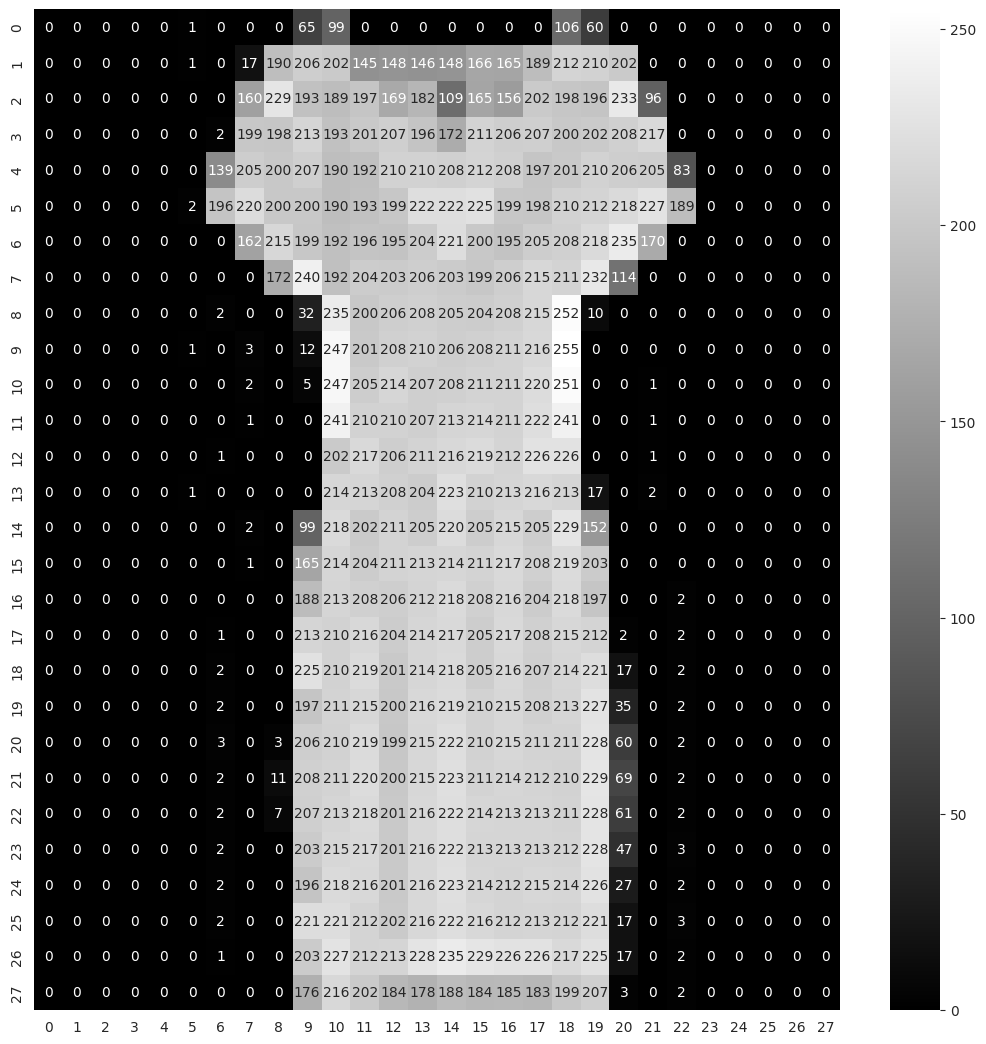

In [11]:
# how the computer sees the image
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[20], annot=True, cmap="gray", fmt=".3g")

In [15]:
# how many classes has the target
np.unique(y_train)
# there are 10 classes from 0 to 10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [33]:
np.unique(y_train, return_counts=True)
# a balanced multiclass data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [16]:
# get the class labeld from data dictionary
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

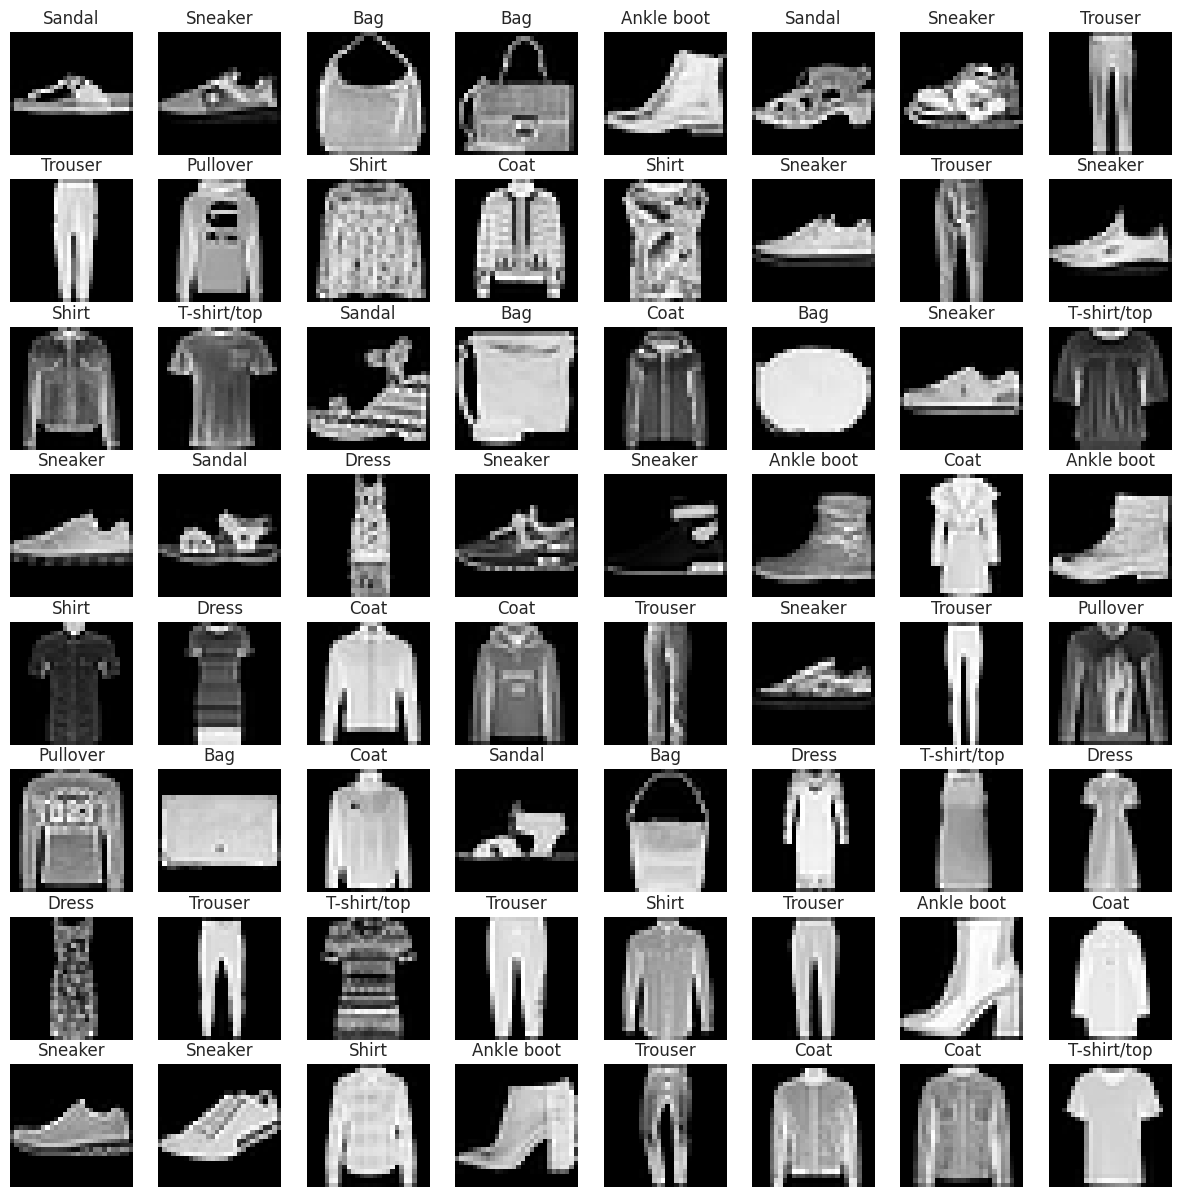

In [35]:
# display random examples for each classes
plt.figure(figsize=(15, 15))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index], cmap="gray") # cmap gray for pseudo color

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
X_train[20].min()
# the darkest value

0

In [19]:
X_train[20].max()

255

In [20]:
# Since we use G Descent, we have to scale the data. We can normalize it by dividing by 255 to limit it between 0 and 1
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

In [21]:
# check min and max again
X_train[20].min()

0.0

In [22]:
X_train[20].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel.**

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
# set the channel number as 1 (for gray images) and reshape the arrays
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
# 10 neurons for output.
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [28]:
# check y_train and Y_train
print(y_train[20]) # class label
print(Y_train[20]) # class in the array as index

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [44]:
# build the model
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # categorical_crossentrppy for multiclass CNN data
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
# check model summary and parameters for each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
# import early stop
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)
# result of the first trial with patience 4 : overfitting tendency after 5th epoch; patience will be set to 2

In [46]:
model.fit(X_train, Y_train, batch_size=32, epochs=25, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3954 - accuracy: 0.8586 - val_loss: 0.2969 - val_accuracy: 0.8938
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2639 - accuracy: 0.9036 - val_loss: 0.2775 - val_accuracy: 0.9000
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2232 - accuracy: 0.9195 - val_loss: 0.2630 - val_accuracy: 0.9064
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1939 - accuracy: 0.9287 - val_loss: 0.2799 - val_accuracy: 0.9063
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1733 - accuracy: 0.9370 - val_loss: 0.2753 - val_accuracy: 0.9065
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1555 - accuracy: 0.9444 - val_loss: 0.2640 - val_accuracy: 0.9138
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1394 - accuracy: 0.9495 - val_loss: 0.2723 - val_accuracy:

**TASK 7: Plot values of metrics you used in your model.**

In [47]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.395,0.859,0.297,0.894
1,0.264,0.904,0.277,0.900
2,0.223,0.919,0.263,0.906
3,0.194,0.929,0.280,0.906
4,0.173,0.937,0.275,0.906


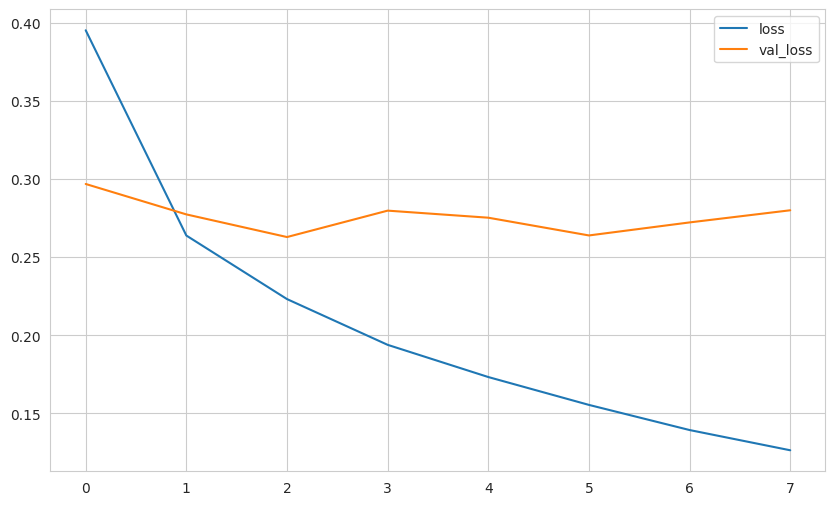

In [48]:
summary[["loss", "val_loss"]].plot();

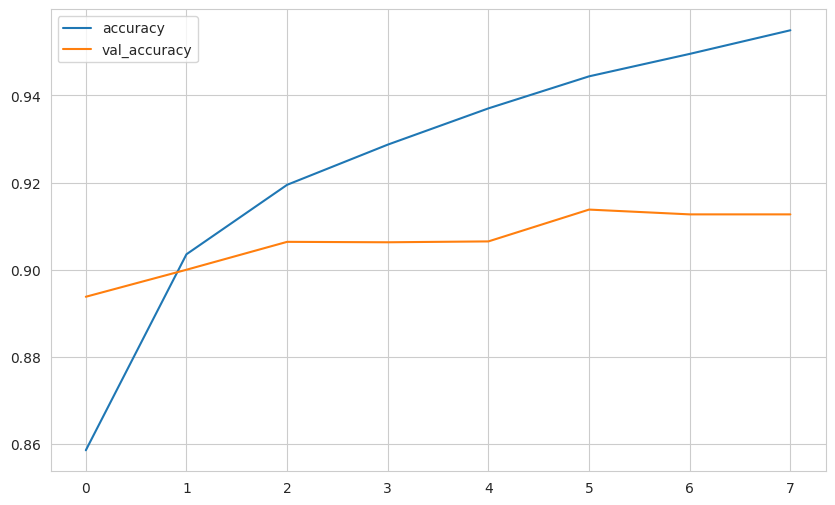

In [49]:
summary[["accuracy", "val_accuracy"]].plot();

In [51]:
from tensorflow.keras.layers import Dropout

In [52]:
# Model will be rebuilt as a more complex model to avoid overfitting
# more convolutional layers and dropout and also ann extra hidden layer will be added
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(Conv2D(filters=36, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.5)) # add dropout to avoid overfitting 

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # categorical_crossentrppy for multiclass CNN data
              optimizer='rmsprop',
              metrics=['accuracy'])

In [53]:
# check model summary and parameters for each layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 36)        9108      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 36)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 36)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        20800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [54]:
model.fit(X_train, Y_train, batch_size=32, epochs=25, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/25
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5622 - accuracy: 0.7906 - val_loss: 0.3645 - val_accuracy: 0.8718
Epoch 2/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3663 - accuracy: 0.8652 - val_loss: 0.3280 - val_accuracy: 0.8853
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3315 - accuracy: 0.8792 - val_loss: 0.3014 - val_accuracy: 0.8941
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3181 - accuracy: 0.8859 - val_loss: 0.2918 - val_accuracy: 0.8999
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3047 - accuracy: 0.8910 - val_loss: 0.2914 - val_accuracy: 0.9023
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3053 - accuracy: 0.8904 - val_loss: 0.2879 - val_accuracy: 0.8980
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3061 - accuracy: 0.8926 - val_loss: 0.3745 - val_ac

In [55]:
summary = pd.DataFrame(model.history.history)
summary.head()
# no overfitting and almost the same val scores for accuracy and loss

,loss,accuracy,val_loss,val_accuracy
0,0.562,0.791,0.365,0.872
1,0.366,0.865,0.328,0.885
2,0.332,0.879,0.301,0.894
3,0.318,0.886,0.292,0.900
4,0.305,0.891,0.291,0.902


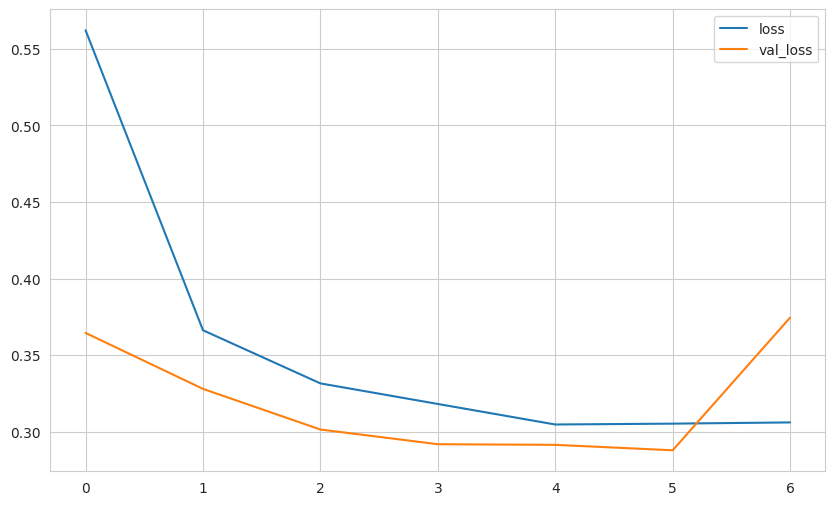

In [56]:
summary[["loss", "val_loss"]].plot();

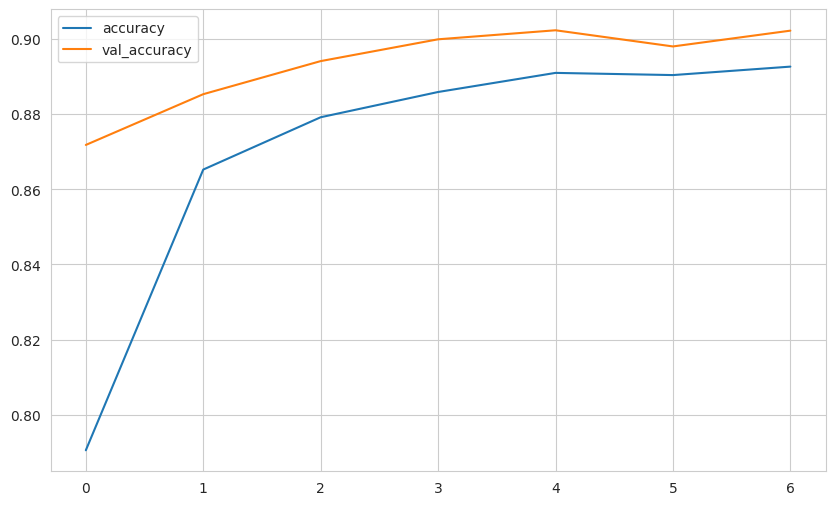

In [57]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [58]:

from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [59]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2914 - accuracy: 0.9023


[0.29141655564308167, 0.9023000001907349]

In [60]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29141655564308167
Test accuracy: 0.9023000001907349


In [61]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.00037616, 0.00000001,
        0.999303  ],
       [0.00087358, 0.00000047, 0.9834167 , ..., 0.        , 0.00001074,
        0.00000062],
       [0.00011039, 0.99977833, 0.00000045, ..., 0.00000001, 0.00000029,
        0.00000048],
       ...,
       [0.00000677, 0.        , 0.00000003, ..., 0.00000001, 0.99998844,
        0.00000003],
       [0.0001729 , 0.9988538 , 0.00000647, ..., 0.00000044, 0.00000337,
        0.00001039],
       [0.00075822, 0.00029409, 0.00001192, ..., 0.20700103, 0.06711488,
        0.03735964]], dtype=float32)

In [62]:
np.argmax(pred_prob[0])

9

In [63]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [64]:
y_pred.shape

(10000,)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.92      0.80      0.86      1000
           3       0.87      0.93      0.90      1000
           4       0.79      0.90      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.72      0.71      0.71      1000
           7       0.92      0.99      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [66]:
print(confusion_matrix(y_test, y_pred))

[[843   0   5  33   5   1 111   0   2   0]
 [  0 962   0  21   6   0   9   0   2   0]
 [ 20   0 803  12  90   0  74   0   1   0]
 [  9   1   4 933  28   0  25   0   0   0]
 [  0   0  19  27 903   0  51   0   0   0]
 [  1   0   0   0   0 972   0  24   0   3]
 [102   0  42  35 103   0 711   0   7   0]
 [  0   0   0   0   0   3   0 990   0   7]
 [  1   0   1   7   3   3  10   5 970   0]
 [  0   0   0   0   0   6   0  58   0 936]]


<Axes: >

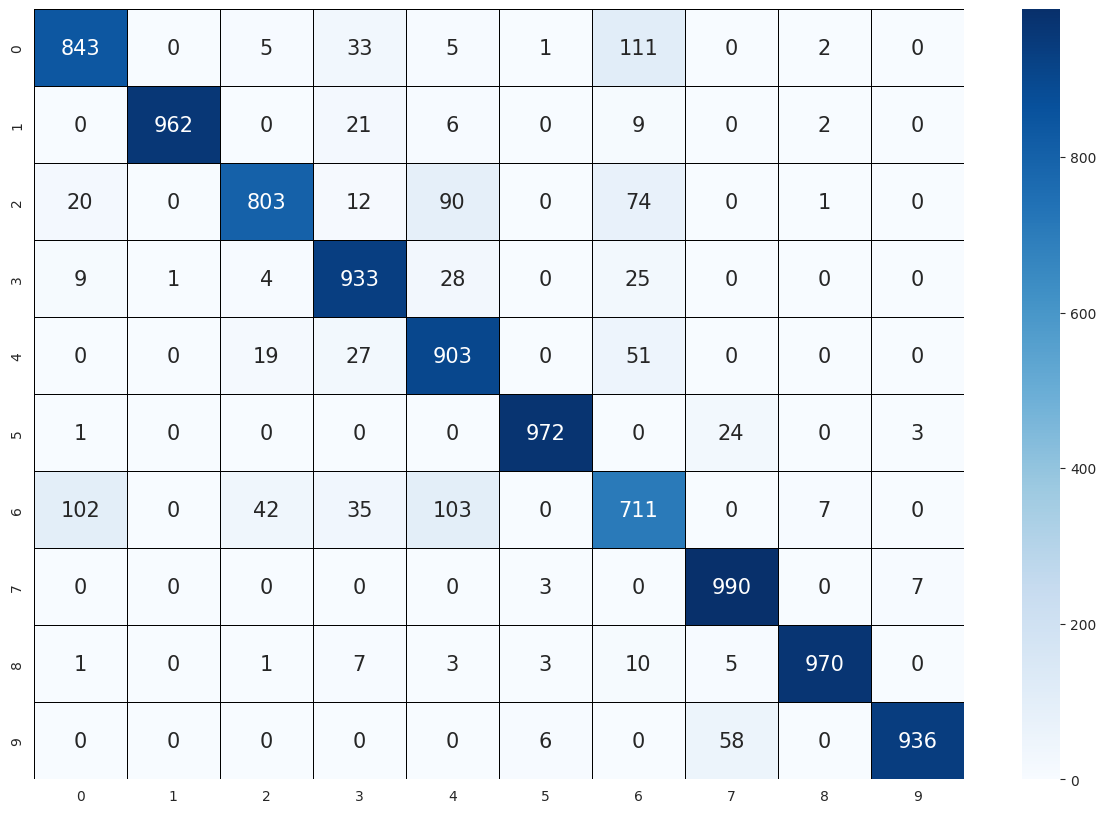

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [68]:
np.equal(y_test, y_pred).sum()
# 9023 true prediction out of 10k samples

9023

## Prediction

In [72]:
pred_example = X_test[125]

In [73]:
pred_example.shape

(28, 28, 1)

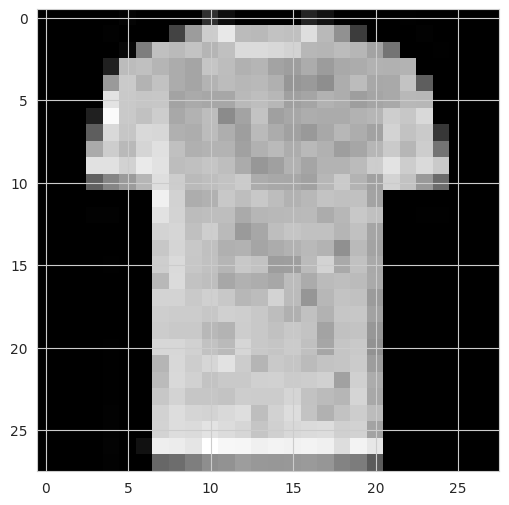

In [74]:
plt.imshow(pred_example, cmap="gray")
plt.show()

In [75]:
pred_prob = model.predict(pred_example.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 104ms/step


array([[0.9567239 , 0.00000126, 0.00008227, 0.0006219 , 0.00000635,
        0.00000005, 0.04255915, 0.00000014, 0.00000486, 0.00000017]],
      dtype=float32)

In [76]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

0

In [77]:
model.save("cnn-mnist.h5")

In [78]:
# use model to check if it functions properly
model=tf.keras.models.load_model('cnn-mnist.h5')

In [79]:
pred=model.predict(np.expand_dims(X_test[224],axis=0))

1/1 [==============================] - 0s 130ms/step


In [80]:
np.argmax(pred)

7

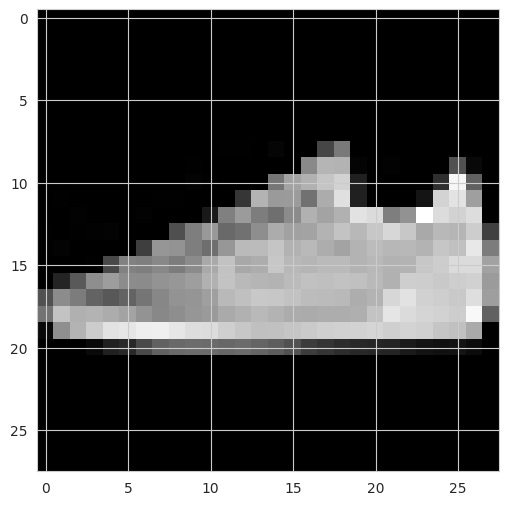

In [82]:
plt.imshow(X_test[224].reshape(28,28), cmap="gray")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___